This is a kaggle competition(https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

Credit to https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard 
and https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
color = sns.color_palette()
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import norm, skew
from scipy import stats

import warnings 
warnings.filterwarnings('ignore')

# labelencoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
# Check data_description.text to know what the meaning of each column 
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [6]:
# check the numbers of samples and features
print('The train data size before dropping Id feature is : {}'.format(train.shape))
print('The test data size before dropping Id feature is : {}'.format(test.shape))

# Save Id column
train_Id = train['Id']
test_Id = test['Id']

# now drop Id column, because it is useless for the prediction process
train.drop('Id', axis=1, inplace = True)
test.drop('Id', axis =1, inplace = True)

# check again the numbers of samples and features after drop Id column
print('\nThe train data size before dropping Id feature is : {}'.format(train.shape))
print('The test data size before dropping Id feature is : {}'.format(test.shape))

The train data size before dropping Id feature is : (1460, 81)
The test data size before dropping Id feature is : (1459, 80)

The train data size before dropping Id feature is : (1460, 80)
The test data size before dropping Id feature is : (1459, 79)


In [7]:
train.info()
print('---'*20)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [8]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### Correlation Matrix

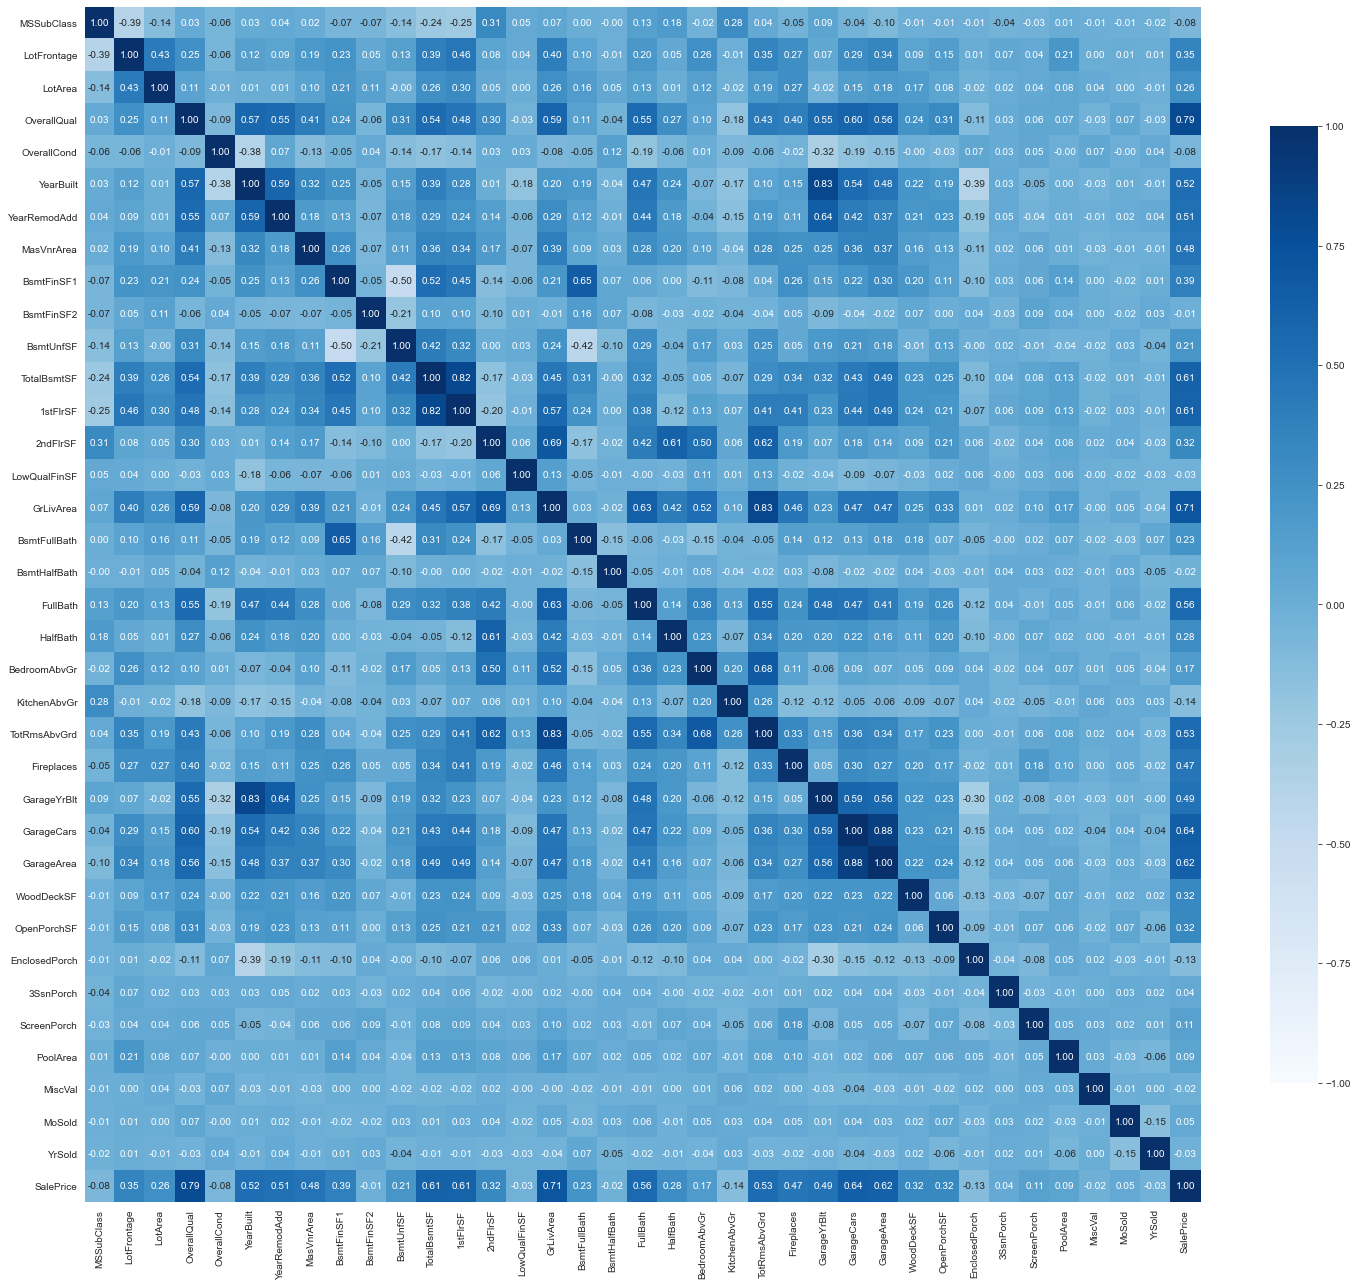

In [9]:
fig, ax = plt.subplots(figsize = (25, 22))

# correlation
corrmap = train.corr()

# plot heatmap
sns.heatmap(corrmap, annot=True, fmt =".2f", cmap='Blues',
           vmin=-1, vmax=1, cbar_kws={'shrink':0.8})

# yticks
plt.yticks(rotation=0)

plt.show()

#### Diverging Palette

Seaborn has an efficient method for that, called .diverging_palette, it serves to build the colormaps we need with one color on each side, converging to another color in the center.

That method uses HUSL colors, so you need hue, saturation, and lightness. I used hsluv.org to select the colors of this chart.

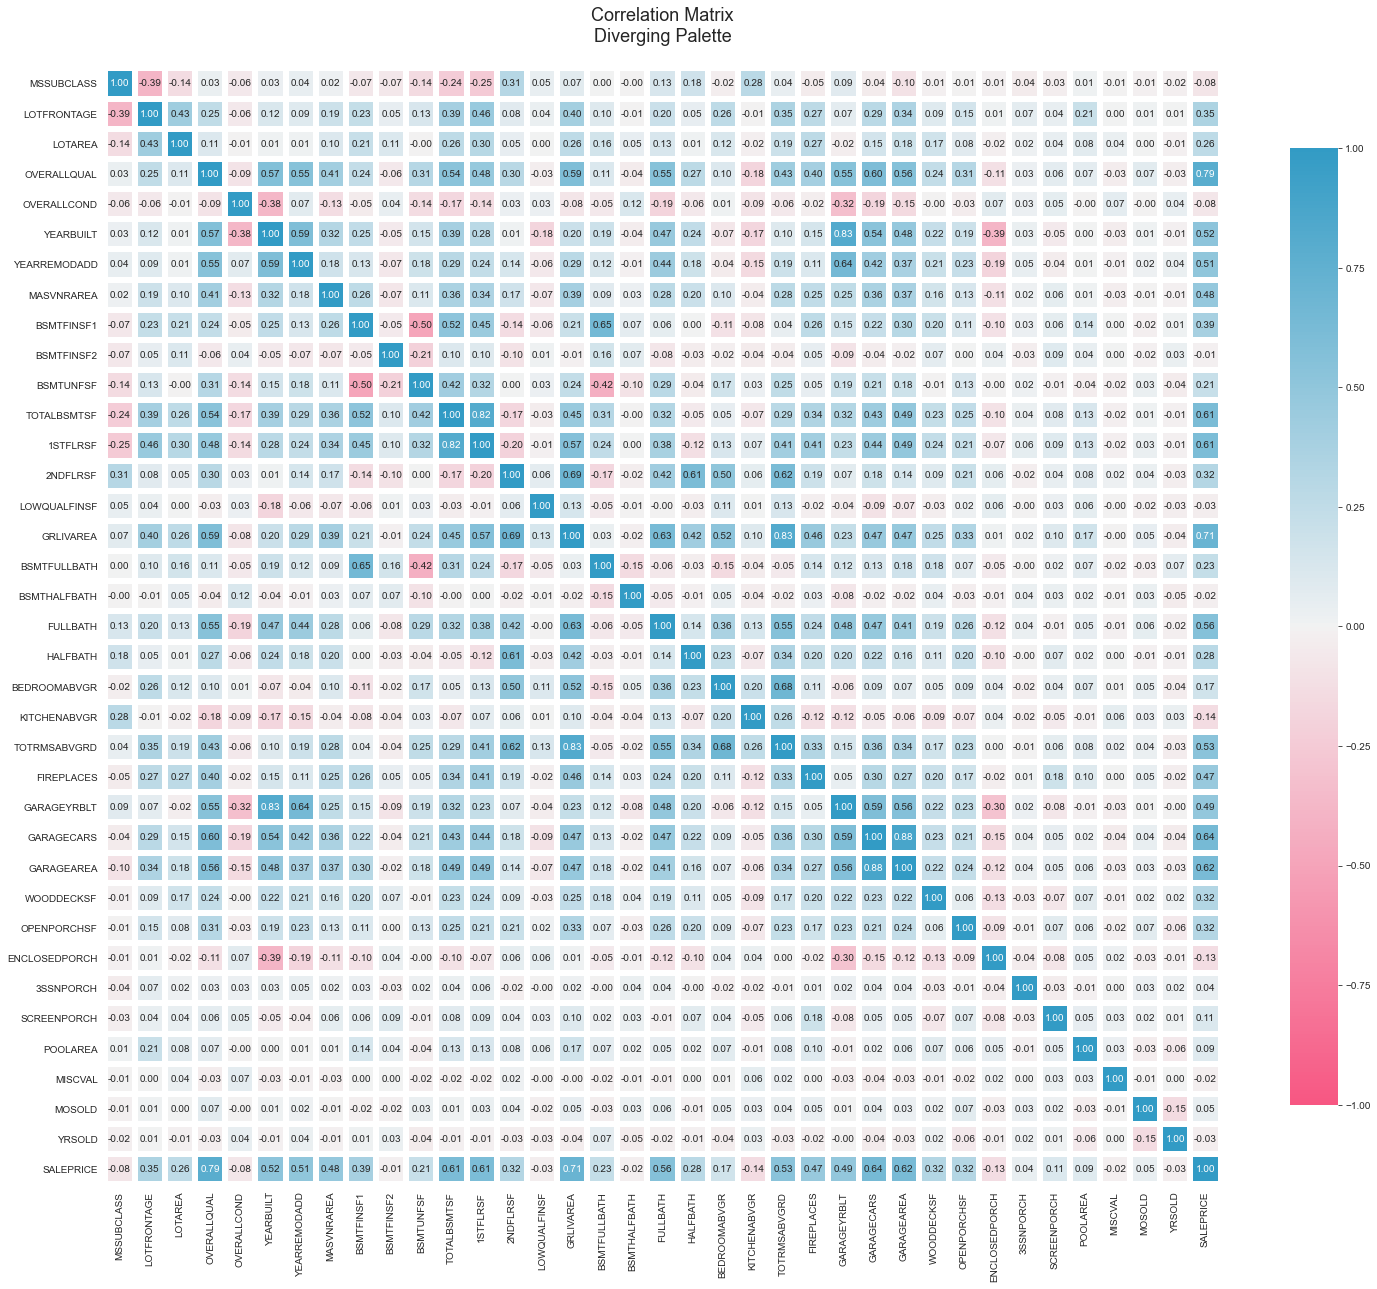

In [10]:
fig, ax = plt.subplots(figsize = (25, 22))

# correlation
corr = train.corr()

# color map
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

# plot heatmap
cmap = sns.heatmap(corr, annot=True, fmt=".2f", linewidths =5, cmap=cmap,
                  vmin=-1, vmax=1, cbar_kws={"shrink":0.8}, square=True)

# ticks
yticks = [i.upper() for i in corr.index]
xticks =[i.upper() for i in corr.columns]

plt.yticks(plt.yticks()[0], labels = yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels = xticks)

# title
title = 'Correlation Matrix\nDiverging Palette\n'
plt.title(title, loc='center', fontsize=18)

plt.show()

#### Density
Usually, after a correlation matrix, we get a better look at the variables with a strong relationship.

In this case, we have enough data to look into, so a scatter plot would be not enough to start investigating those variables.

The problem with scatter plots is that they tend to become hard to read with too much data, as the points start to overlap. That’s when heatmaps get back in the scene, to visualize density.

here I chose the density between SalsePrice and LotArea to show the density map

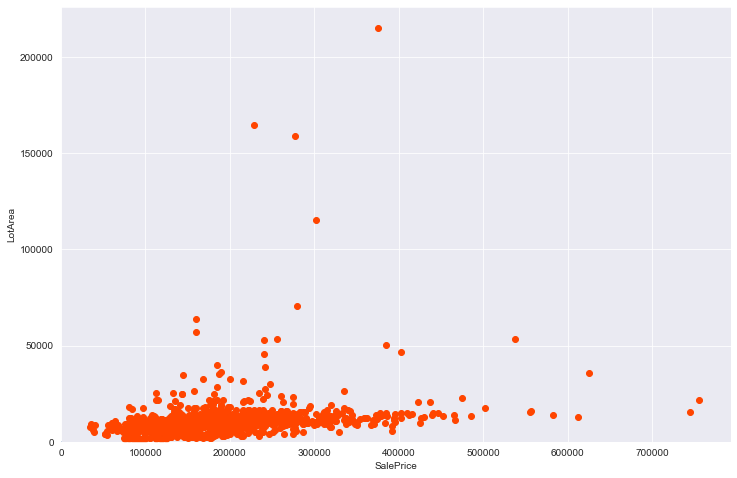

In [11]:
fig, ax = plt.subplots(1, figsize =(12, 8))

sns.kdeplot(train['SalePrice'],train['LotArea'], cmap ='Blues', 
            shade=True, shade_lowest = False, clip=(-1, 300))

plt.scatter(train['SalePrice'],train['LotArea'], color ='orangered')

## Analyze by visualizing data

From correlation matrix, I choose the correlation over 0.5 with SalePrice to analyze them.
Here: 
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
       
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions) 

TotalBsmtSF: Total square feet of basement area

1stFlrSF: First Floor square feet 

GrLivArea: Above grade (ground) living area square feet

FullBath: Full bathrooms above grade

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

Other features are also import, will focus on them at missing data part.

In [12]:
train_corr = train[['TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageArea', 'OverallQual', 'YearBuilt', 
                   'YearRemodAdd', 'FullBath', 'TotRmsAbvGrd', 'GarageCars']]
train_corr

TotalBsmtSF  1stFlrSF  GrLivArea  GarageArea  OverallQual  YearBuilt  \
0             856       856       1710         548            7       2003   
1            1262      1262       1262         460            6       1976   
2             920       920       1786         608            7       2001   
3             756       961       1717         642            7       1915   
4            1145      1145       2198         836            8       2000   
...           ...       ...        ...         ...          ...        ...   
1455          953       953       1647         460            6       1999   
1456         1542      2073       2073         500            6       1978   
1457         1152      1188       2340         252            7       1941   
1458         1078      1078       1078         240            5       1950   
1459         1256      1256       1256         276            5       1965   

      YearRemodAdd  FullBath  TotRmsAbvGrd  GarageCars  
0             2003         2             8           2  
1             1976         2             6           2  
2             2002         2             6           2  
3             1970         1             7           3  
4             2000         2             9           3  
...            ...       ...           ...         ...  
1455          2000         2             7           2  
1456          1988         2             7           2  
1457          2006         2             9           1  
1458          1996         1             5           1  
1459          1965         1             6           1  

[1460 rows x 10 columns]

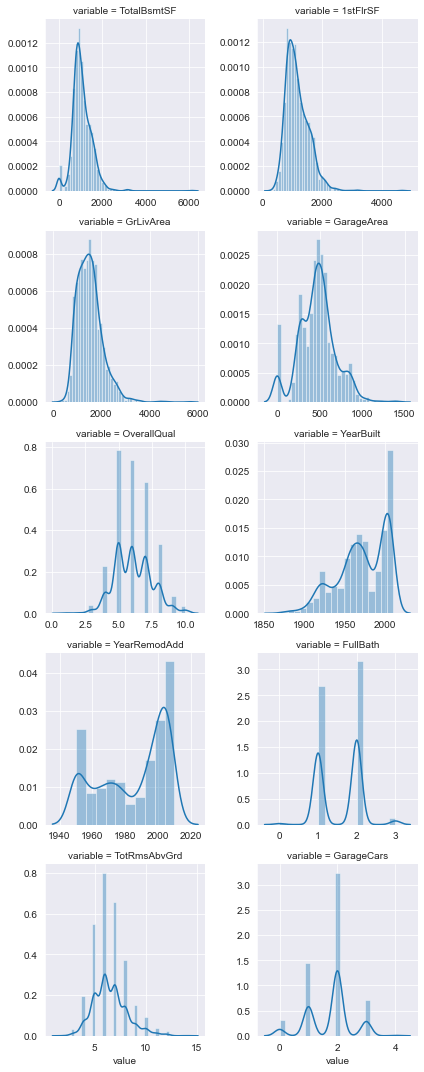

In [13]:
quantitative = [f for f in train_corr.columns if train_corr.dtypes[f] != 'object']
f = pd.melt(train_corr, value_vars = quantitative)
g = sns.FacetGrid(f, col ='variable', col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

#### TotalBsmtSF, 1stFlrSF, GrLivArea and GarageArea are numerical variables, visualzing with scatter plot

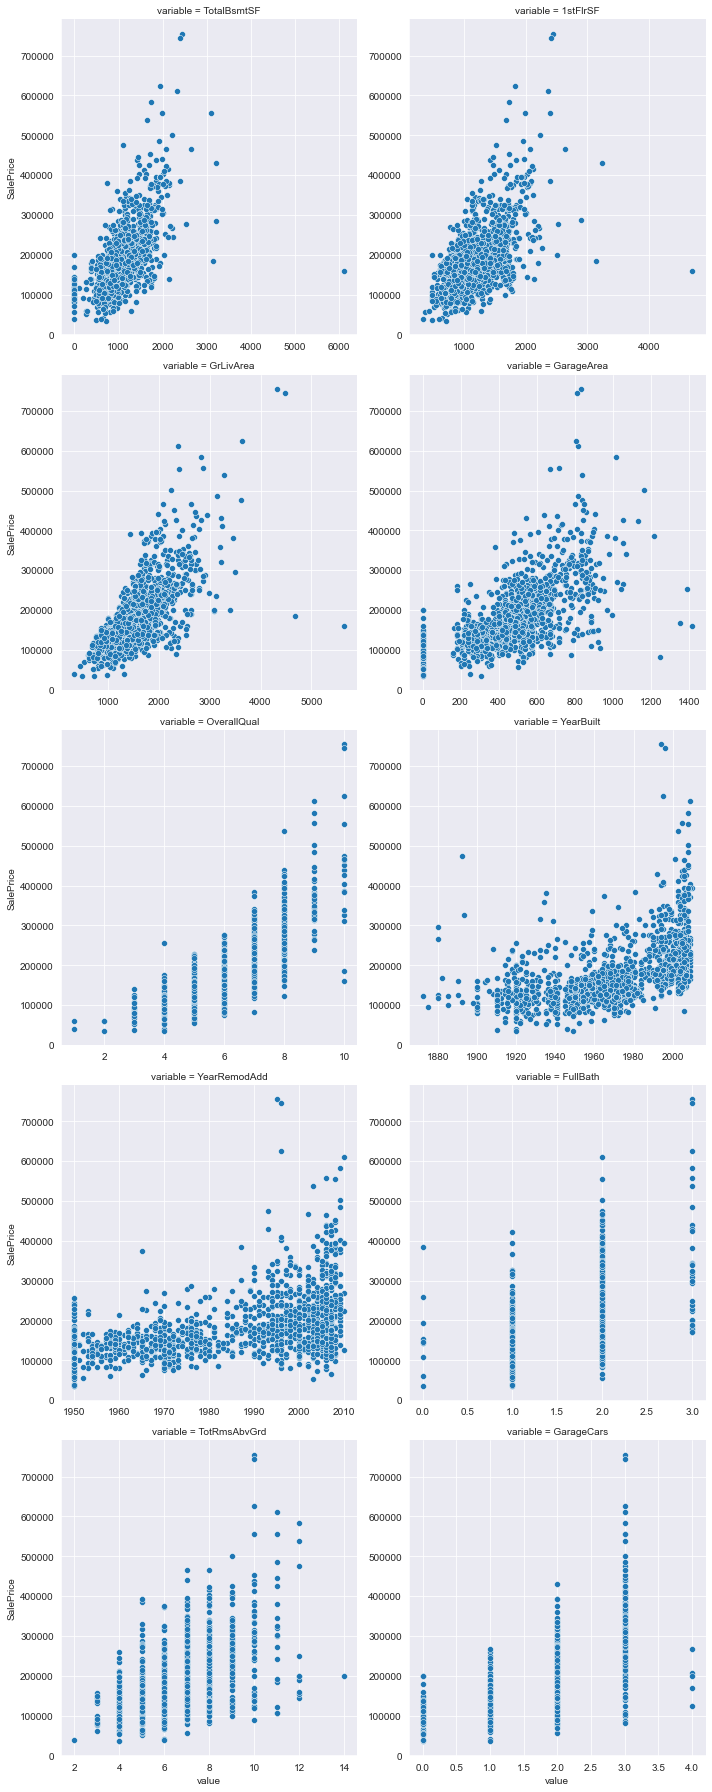

In [14]:
def scatter(x, y, **kwargs):
    sns.scatterplot(x = x, y = y)
    
f = pd.melt(train, id_vars = ['SalePrice'], value_vars = quantitative)
g = sns.FacetGrid(f, col='variable', col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(scatter, 'value', 'SalePrice')

#### The remaining features (OverallQual, YearBuilt, YearRemodAdd, FullBath, TotRmsAbvGrd, GarageCars) are categorical features, visulazing with boxplot 


In [15]:
## for missing values, I will deal it later, it is not a good idea replace all missing values with MISSING

#for c in qualitative:
#    train_corr[c] = train_corr[c].astype('category')
#    if train_corr[c].isnull().any():
#        train_corr[c] = train_corr[c].cat.add_categories(['MISSING'])
#        train_corr[c] = train_corr[c].fillna('MISSING')

This is for object features of train dataset in boxplot

In [16]:
qualitative = [f for f in train.columns if train.dtypes[f] == 'object']

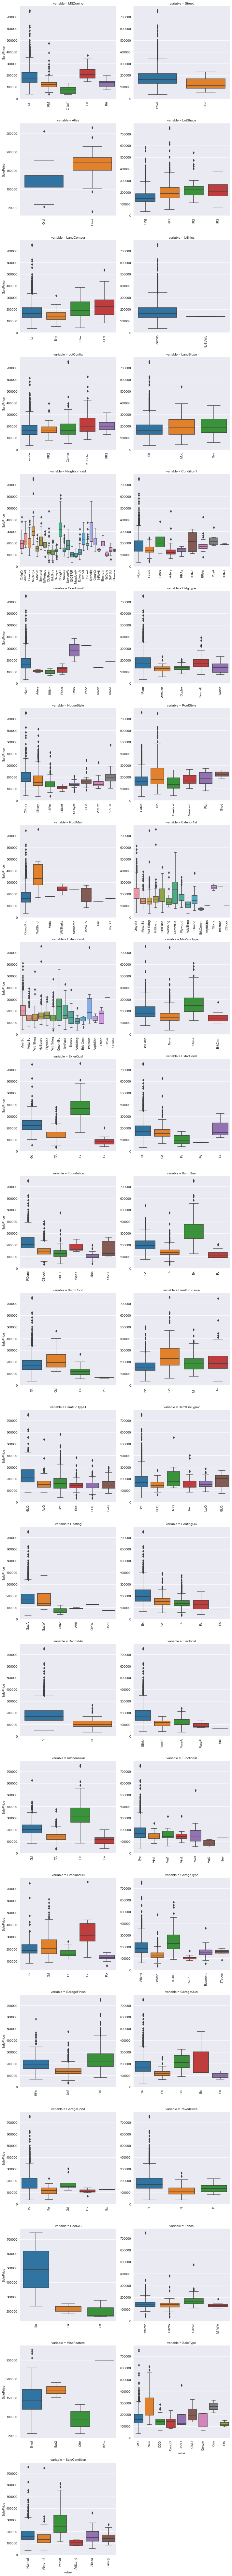

In [17]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x = x, y=y)
    x = plt.xticks(rotation=90)

f = pd.melt(train, id_vars = ['SalePrice'], value_vars = qualitative)
g = sns.FacetGrid(f, col='variable', col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, 'value', 'SalePrice')

Some categories features of train dataset in boxplot

(-0.5, 4.5, 0.0, 800000.0)

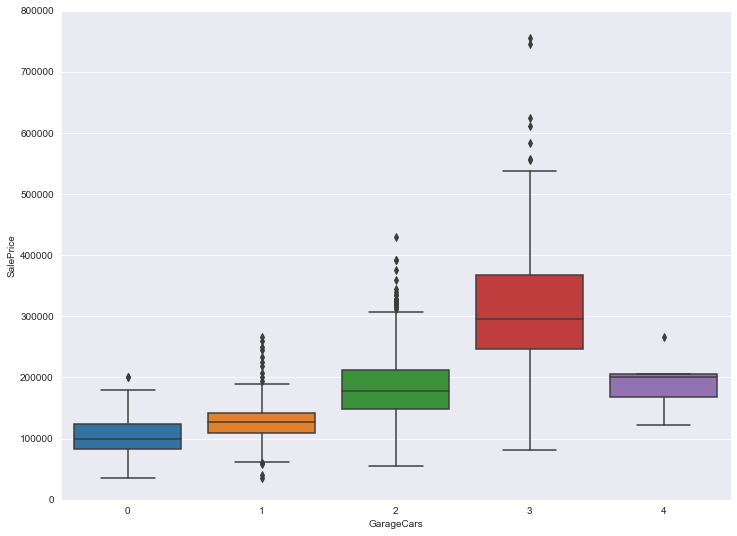

In [18]:
# boxplot GarageCars / saleprice
data = pd.concat([train['SalePrice'], train['GarageCars']], axis = 1)
f, ax = plt.subplots(figsize=(12, 9))
fig = sns.boxplot(x = 'GarageCars', y= 'SalePrice', data=data)
fig.axis(ymin=0, ymax = 800000)

(-0.5, 9.5, 0.0, 800000.0)

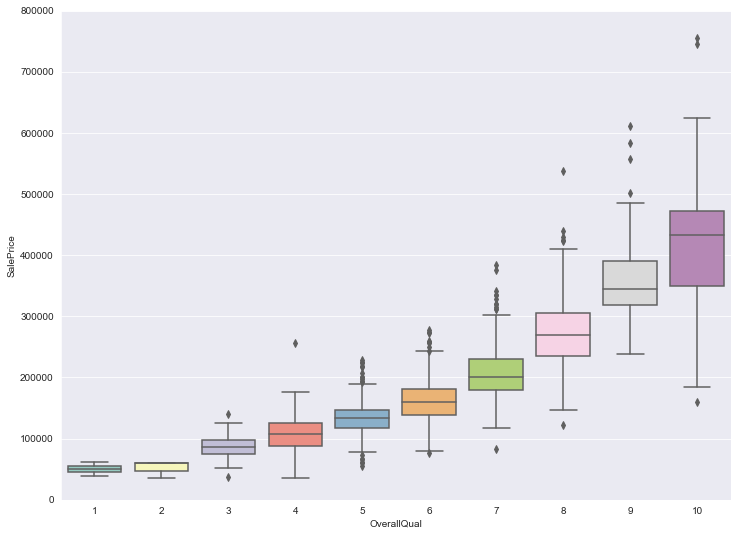

In [19]:
# box plot overallqual / saleprice
data = pd.concat([train['SalePrice'], train['OverallQual']], axis = 1)
f, ax = plt.subplots(figsize=(12, 9))
fig = sns.boxplot(x = 'OverallQual', y= 'SalePrice', data = data, palette = 'Set3')
fig.axis(ymin=0, ymax = 800000)

Use swarmplot() to show the datapoints on top of the boxes:

(-0.5, 9.5, 0.0, 800000.0)

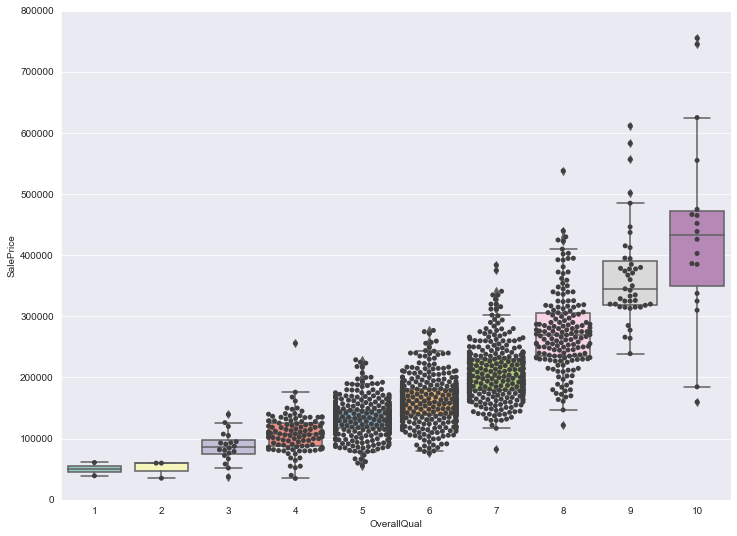

In [20]:
# box plot and swarmplot overallqual / saleprice
data = pd.concat([train['SalePrice'], train['OverallQual']], axis = 1)
f, ax = plt.subplots(figsize=(12, 9))
fig = sns.boxplot(x = 'OverallQual', y= 'SalePrice', data = data, palette = 'Set3')
fig = sns.swarmplot(x = 'OverallQual', y= 'SalePrice', data = data, color ='.25')
fig.axis(ymin=0, ymax = 800000)

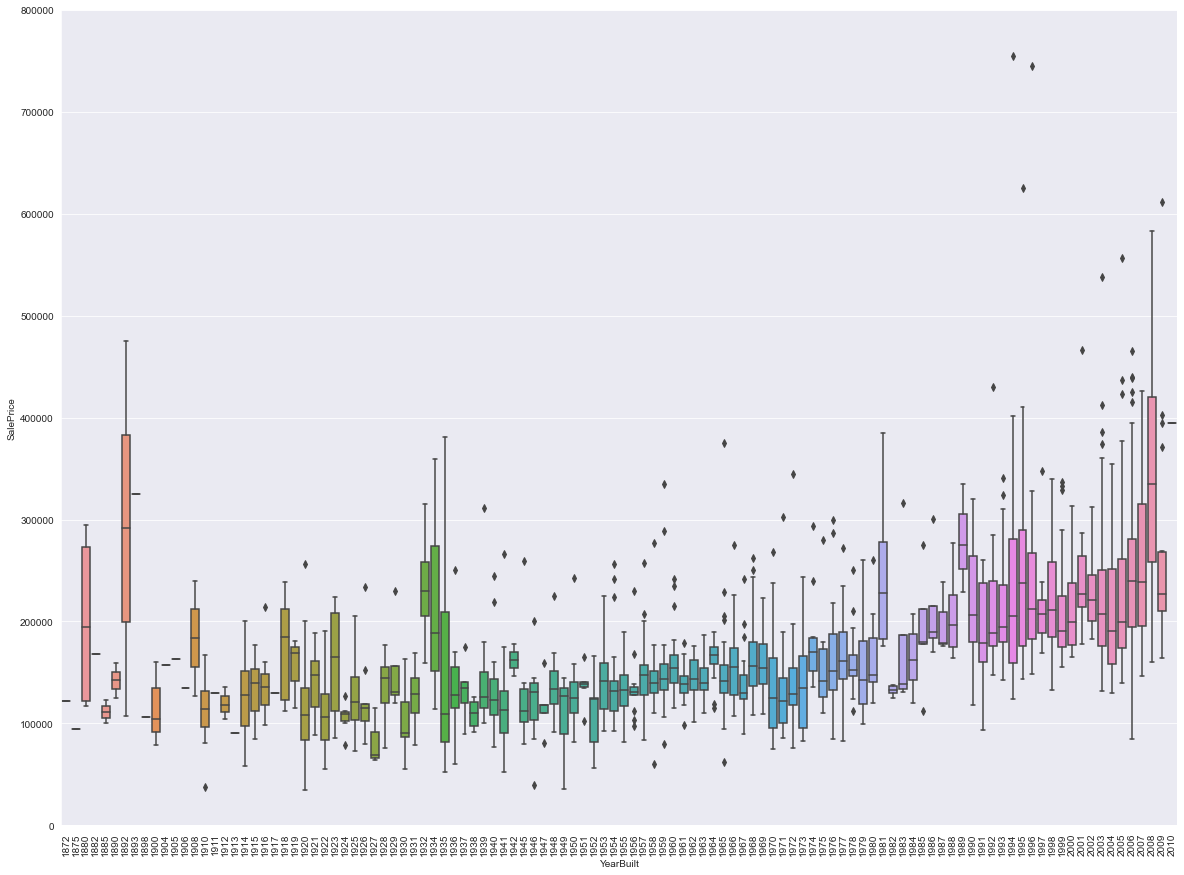

In [21]:
# box plot YearBuilt / saleprice
data = pd.concat([train['SalePrice'], train['YearBuilt']], axis = 1)
f, ax = plt.subplots(figsize=(20, 15))
fig = sns.boxplot(x = 'YearBuilt', y= 'SalePrice',data = data)
fig.axis(ymin=0, ymax = 800000)
plt.xticks(rotation=90)
plt.show()

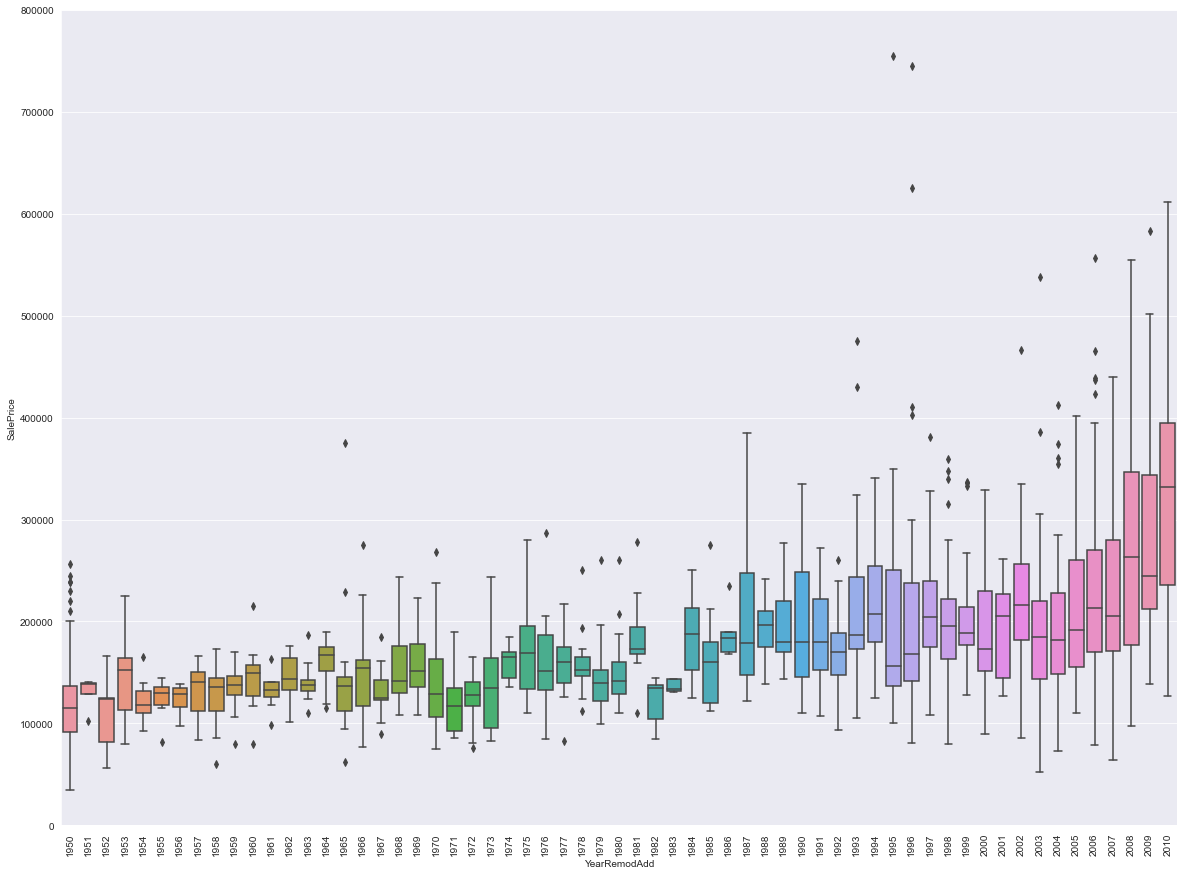

In [22]:
# box plot YearRemodAdd / saleprice
data = pd.concat([train['SalePrice'], train['YearRemodAdd']], axis = 1)
f, ax = plt.subplots(figsize=(20, 15))
fig = sns.boxplot(x = 'YearRemodAdd', y= 'SalePrice',data = data)
fig.axis(ymin=0, ymax = 800000)
plt.xticks(rotation=90)
plt.show()

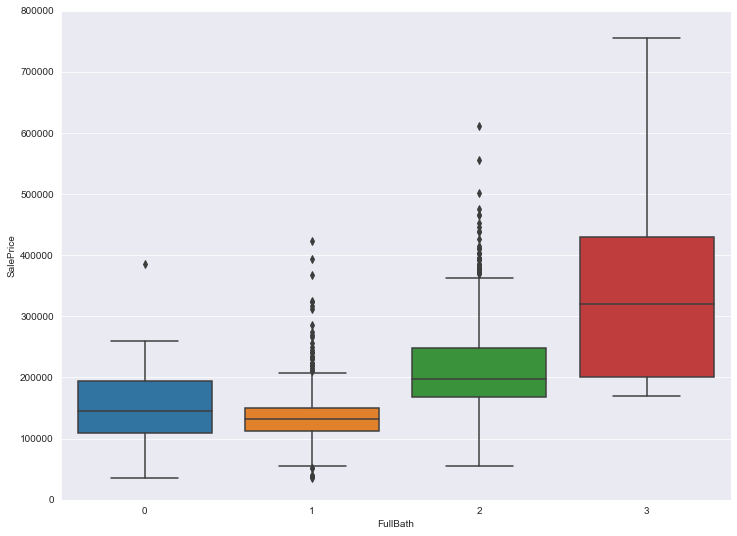

In [23]:
# box plot FullBath / saleprice
data = pd.concat([train['SalePrice'], train['FullBath']], axis = 1)
f, ax = plt.subplots(figsize=(12, 9))
fig = sns.boxplot(x = 'FullBath', y= 'SalePrice',data = data)
fig.axis(ymin=0, ymax = 800000)
plt.show()

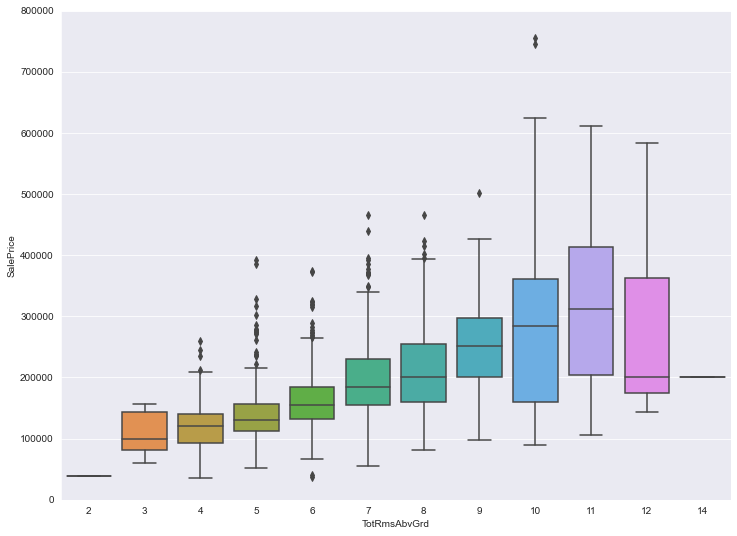

In [24]:
# box plot TotRmsAbvGrd / saleprice
data = pd.concat([train['SalePrice'], train['TotRmsAbvGrd']], axis = 1)
f, ax = plt.subplots(figsize=(12, 9))
fig = sns.boxplot(x = 'TotRmsAbvGrd', y= 'SalePrice',data = data)
fig.axis(ymin=0, ymax = 800000)
plt.show()

Not sure whehter Neighborhood is a strong feature, analyze result 

Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker

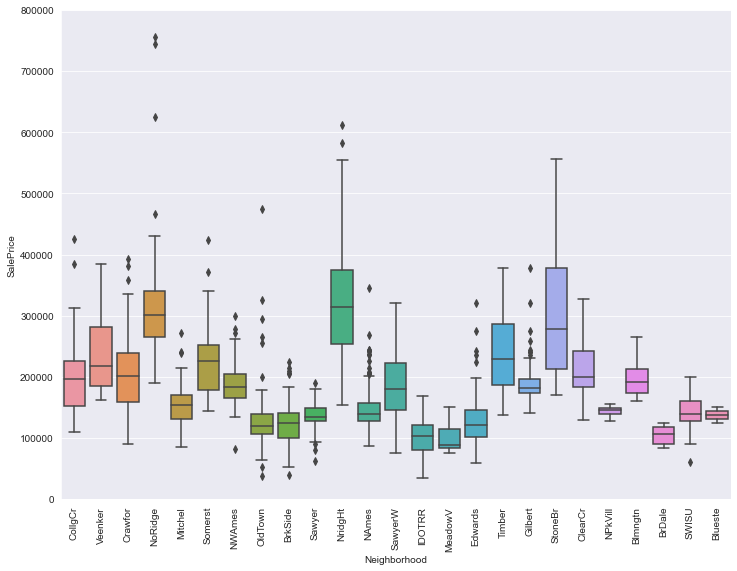

In [25]:
# box plot Neighborhood / saleprice
data = pd.concat([train['SalePrice'], train['Neighborhood']], axis = 1)
f, ax = plt.subplots(figsize=(12, 9))
fig = sns.boxplot(x = 'Neighborhood', y= 'SalePrice',data = data)
fig.axis(ymin=0, ymax = 800000)
plt.xticks(rotation=90)
plt.show()

In [26]:
train[['YearBuilt', 'SalePrice']].groupby(['YearBuilt'], as_index = False).mean().sort_values(
by ='SalePrice', ascending =False)

YearBuilt      SalePrice
111       2010  394432.000000
109       2008  348849.130435
7         1893  325000.000000
6         1892  291250.000000
90        1989  279500.000000
..         ...            ...
28        1924  105985.714286
34        1930  103588.888889
1         1875   94000.000000
17        1913   90350.000000
31        1927   82666.666667

[112 rows x 2 columns]

In [27]:
train[['TotRmsAbvGrd', 'SalePrice']].groupby(['TotRmsAbvGrd'], as_index = False).mean().sort_values(
by ='SalePrice', ascending=False)

TotRmsAbvGrd      SalePrice
9             11  318022.000000
8             10  296279.170213
10            12  280971.454545
7              9  252988.173333
6              8  213427.529412
11            14  200000.000000
5              7  196666.784195
4              6  161303.296020
3              5  141550.749091
2              4  122844.628866
1              3  111217.647059
0              2   39300.000000

In [28]:
train[['FullBath', 'SalePrice']].groupby(['FullBath'], as_index = False).mean().sort_values(
by ='SalePrice', ascending=False)

FullBath      SalePrice
3         3  347822.909091
2         2  213009.825521
0         0  165200.888889
1         1  134751.440000

Scatter plots between 'SalePrice' and correlated variables

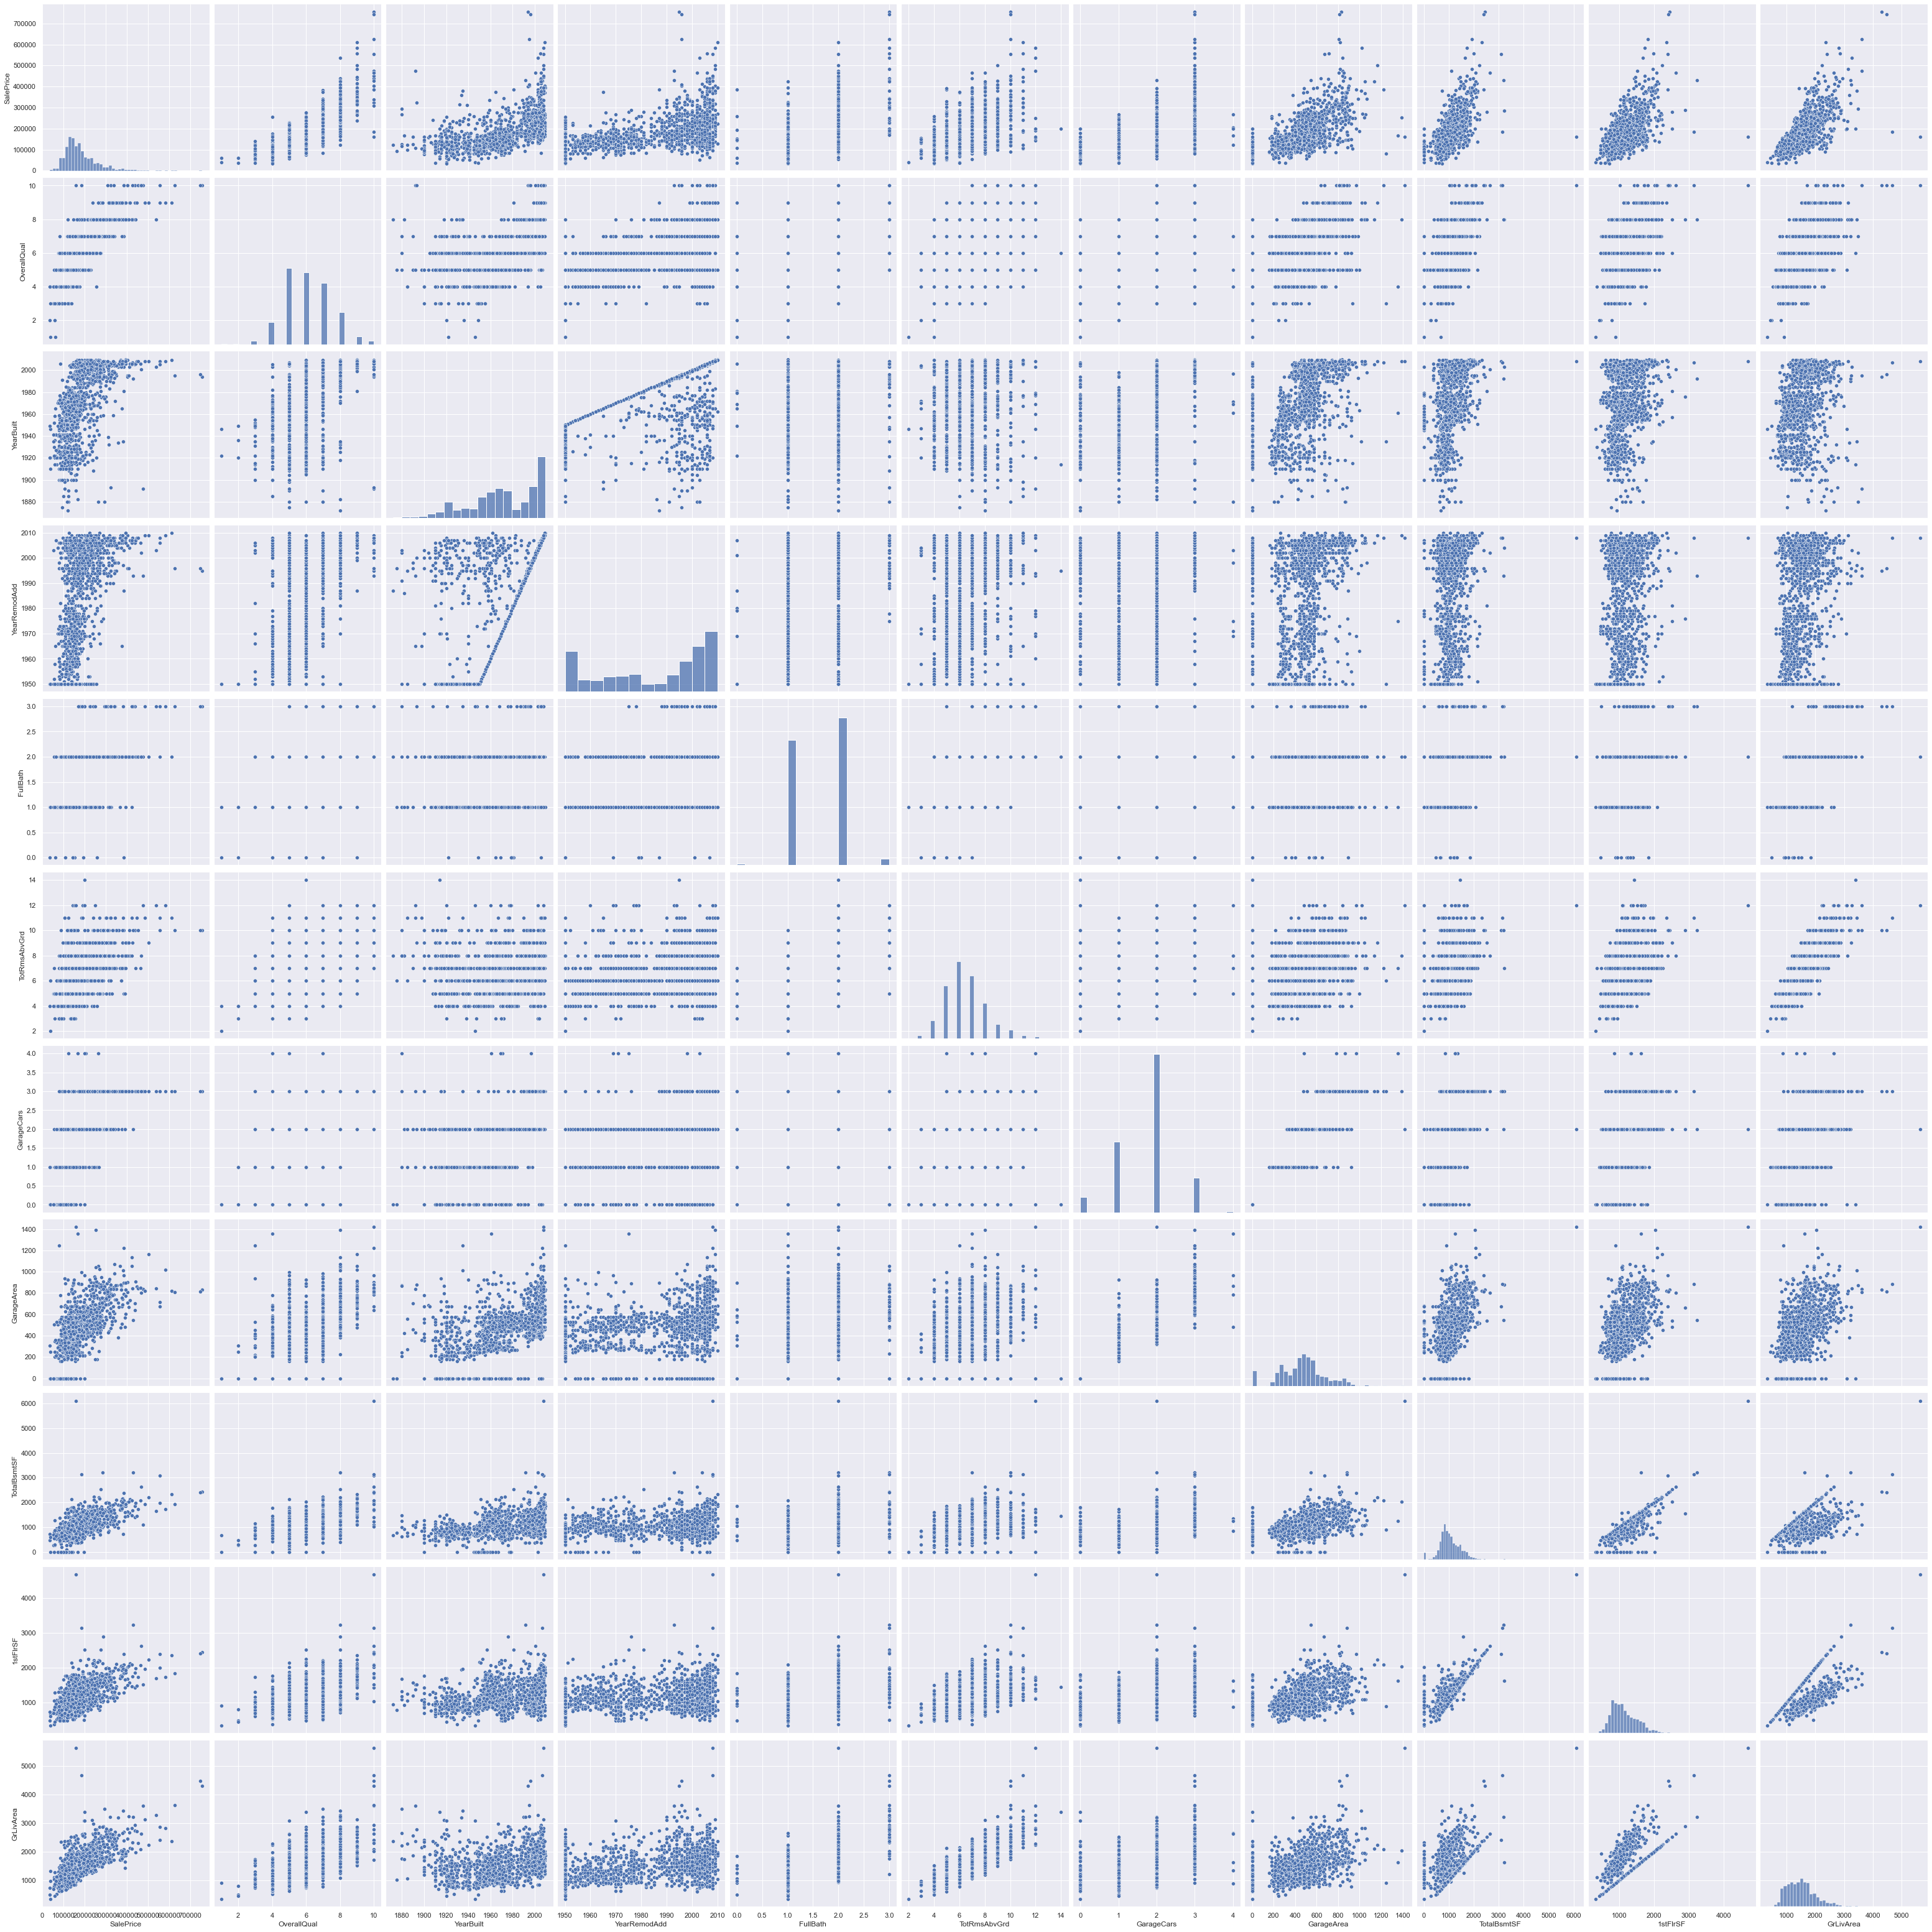

In [29]:
# scatterplot 
sns.set()
cols = ['SalePrice', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'FullBath', 'TotRmsAbvGrd', 
        'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea']
sns.pairplot(train[cols], size=4)
plt.show()

These features (OverallQual, YearBuilt, YearRemodAdd, FullBath, TotRmsAbvGrd, GarageCars, GarageArea, 
TotalBsmtSF, 1stFlrSF, GrLivArea) have a strong correlation with SalePrice based on the matrix map, boxplot and scatter plot. Next, I will focus on how to deal with missing data

### Norm and log norm

The point here is to test 'SalePrice' in a very lean way. We'll do this paying attention to:

Histogram - Kurtosis and skewness.

Normal probability plot - Data distribution should closely follow the diagonal that represents the normal distribution.

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

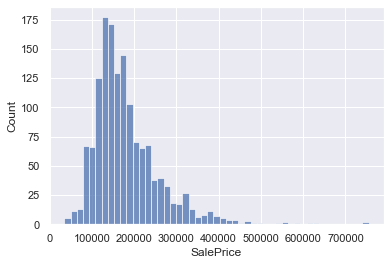

In [30]:
sns.histplot(data = train, x = 'SalePrice')


 mu = 180921.20 and sigma = 79415.29



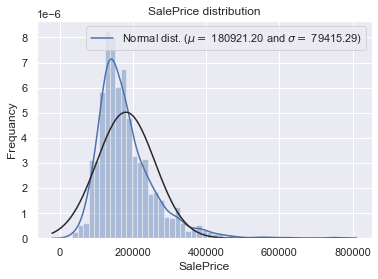

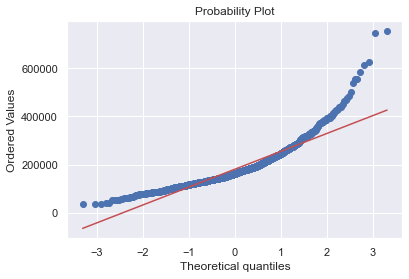

In [31]:
sns.distplot(train['SalePrice'], fit = norm)

# get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu, sigma)], loc='best')
plt.ylabel('Frequancy')
plt.title('SalePrice distribution')

# get the qq plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [32]:
# Skewness and kurtosis
print('Skewness: %f' % train['SalePrice'].skew())
print('Kurtosis: %f' % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


The target variable is right skewed. As (linear) models love normally distributed data , we need to transform this variable and make it more normally distributed. Here is the link that talk about why and when apply Log-transformation of the target variable (https://www.kaggle.com/product-feedback/164183).


 mu = 12.02 and sigma = 0.40



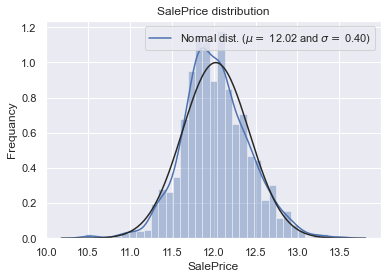

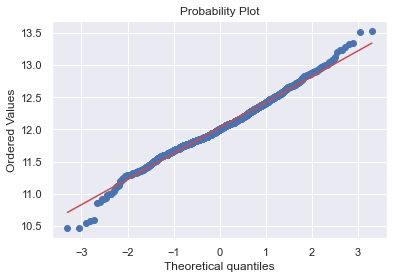

In [33]:
# Use the numpy function log1p which applies log(1+x) to all elements of the column
train['SalePrice'] = np.log1p(train['SalePrice'])

# check the new distribution
sns.distplot(train['SalePrice'], fit=norm)

# get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu, sigma)], loc='best')
plt.ylabel('Frequancy')
plt.title('SalePrice distribution')

# get the qq plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [34]:
# Skewness and kurtosis, after log-transfomation
print('Skewness: %f' % train['SalePrice'].skew())
print('Kurtosis: %f' % train['SalePrice'].kurt())

Skewness: 0.121347
Kurtosis: 0.809519


### Features engineering

In [35]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop =True)
all_data.drop(['SalePrice'], axis =1, inplace = True)
print('all_data size is : {}'.format(all_data.shape))

all_data size is : (2919, 79)


### Missing data (all_data)

In [36]:
# Check miss data and the percent of miss data in all_data
total = all_data.isnull().sum().sort_values(ascending = False)
prop  = (all_data.isnull().sum()/all_data.isnull().count()).sort_values(ascending = False)[:35]*100
missing_data = pd.concat([total, prop], axis = 1, keys=['Total', 'Prop'])
missing_data.head(10)

Total       Prop
PoolQC         2909  99.657417
MiscFeature    2814  96.402878
Alley          2721  93.216855
Fence          2348  80.438506
FireplaceQu    1420  48.646797
LotFrontage     486  16.649538
GarageYrBlt     159   5.447071
GarageFinish    159   5.447071
GarageQual      159   5.447071
GarageCond      159   5.447071

Text(0.5, 1.0, 'Percent missing data by feature')

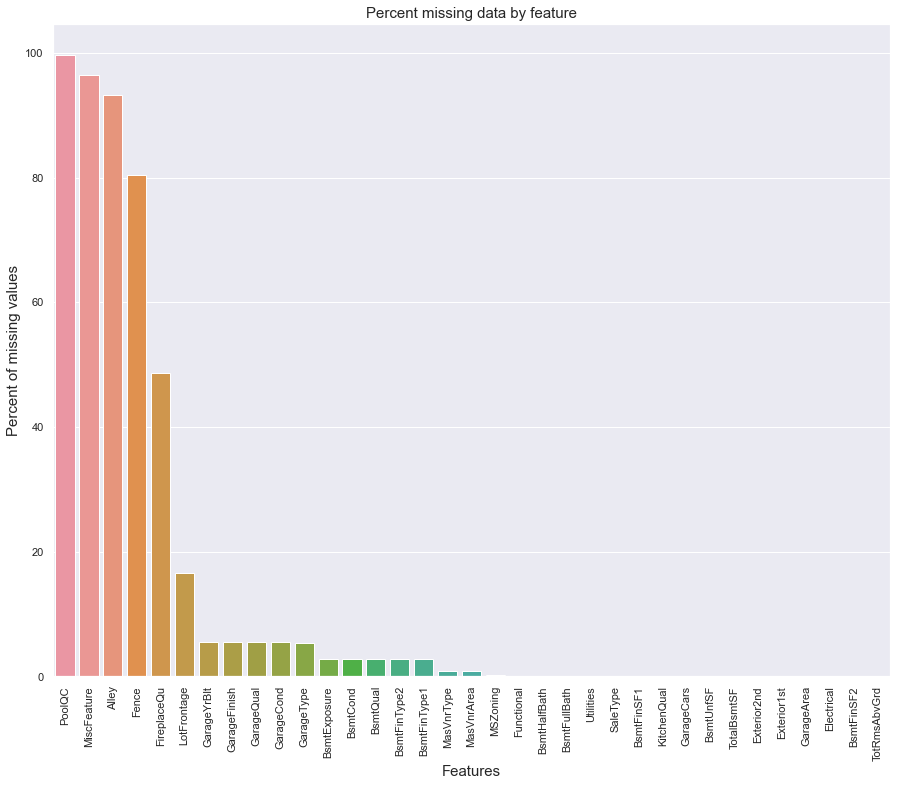

In [37]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation ='90')
sns.barplot(x =prop.index, y=prop)
plt.xlabel('Features', fontsize = 15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

### Missing data (train)

In [38]:
# Check miss data and the percent of miss data
# train
total = train.isnull().sum().sort_values(ascending = False)
prop  = (train.isnull().sum()/train.isnull().count()).sort_values(ascending = False)[:25]
missing_data = pd.concat([total, prop], axis = 1, keys=['Total', 'Prop'])
missing_data.head(10)

Total      Prop
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageYrBlt      81  0.055479
GarageCond       81  0.055479
GarageType       81  0.055479
GarageFinish     81  0.055479

Text(0.5, 1.0, 'Percent missing data by feature')

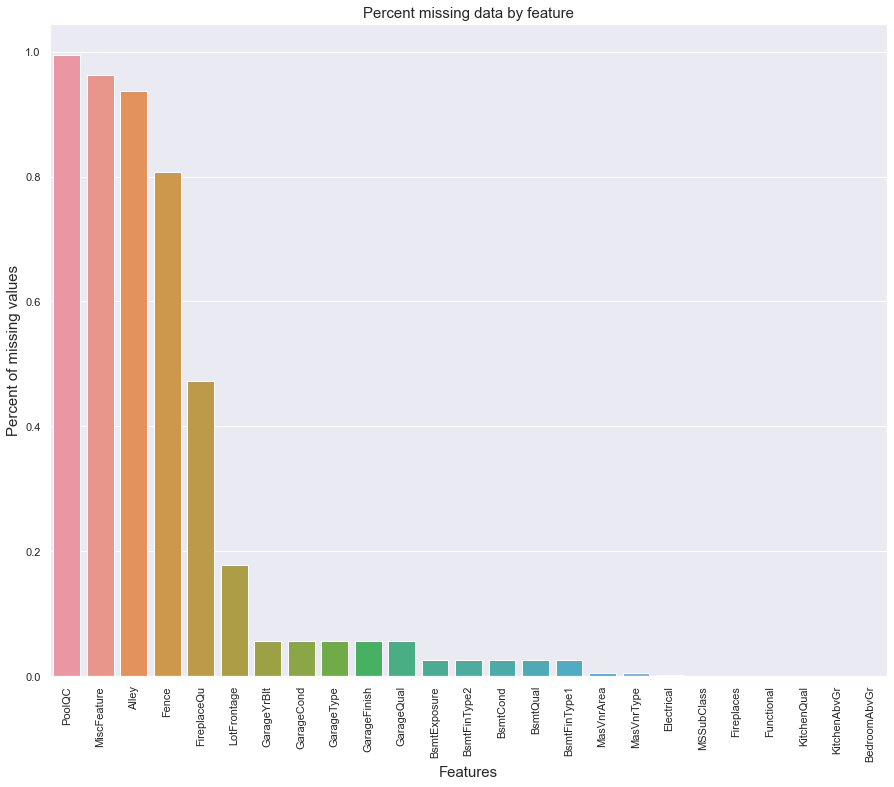

In [39]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation ='90')
sns.barplot(x =prop.index, y=prop)
plt.xlabel('Features', fontsize = 15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

### The description of missing data features in train
PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
       
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
       
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
       
FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
       
LotFrontage: Linear feet of street connected to property

GarageYrBlt: Year garage was built

GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
       
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
       
GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
       
BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
       
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement       

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet

Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

### Imputing missing values

1. In data description, these features, PoolQC, MiscFeature, Alley, Fence, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, MSSubClass and MasVnrType are said NA means 'no xxx',  so we fill missing values in these features with None, even though some of them has a huge ration of missing values (like 99%).

In [40]:
for cols in ('PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
             'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType', 'MSSubClass'):
    all_data[cols] = all_data[cols].fillna('None')

2. LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.

In [41]:
# group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

3. GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.)
    
BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having no basement
    
MasVnrArea: fill 0 for the area

In [42]:
for cols in ('GarageYrBlt', 'GarageArea', 'GarageCars', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
             'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[cols] = all_data[cols].fillna(0)

4. MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
        
'RL' is by far the most common value. So we can fill in missing values with 'RL'

Electrical: Electrical system

   SBrkr    Standard Circuit Breakers & Romex
   FuseA    Fuse Box over 60 AMP and all Romex wiring (Average)    
   FuseF    60 AMP Fuse Box and mostly Romex wiring (Fair)
   FuseP    60 AMP Fuse Box and mostly knob & tube wiring (poor)
   Mix    Mixed
   
Only 1 NA value, 'SBrkr' is the most common value, fill NA with it.

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
        
only one NA value, 'TA' is the most common value, use it to fill NA.

Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string

SaleType : Fill in again with most frequent which is "WD"

In [43]:
for cols in ('MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType'):
    all_data[cols].value_counts()[:3].sort_values(ascending=False)

The mode of a set of data values is the value that appears most often. It is the value at which the data is most likely to be sampled. A mode of a continuous probability distribution is often considered to be any value x at which its probability density function has a local maximum value, so any peak is a mode.
Python is very robust when it comes to statistics and working with a set of a large range of values. The statistics module has a very large number of functions to work with very large data-sets. The mode() function is one of such methods. This function returns the robust measure of a central data point in a given range of data-sets.

In [44]:
for cols in ('MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType'):
    all_data[cols] = all_data[cols].fillna(all_data[cols].mode()[0])

5. Utilities: Type of utilities available

       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	

There are 2916 AllPub, 1 NoSeWa and 2 NA in this feature. Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.

In [45]:
all_data['Utilities'].value_counts()[:5].sort_values(ascending=False)

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [46]:
all_data = all_data.drop(['Utilities'], axis=1)

6. Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
    
NA means typical(Typ)

In [47]:
all_data['Functional'] = all_data['Functional'].fillna('Typ')

#### Check remaining miss values if any

In [48]:
# Check miss data, there is no missing values now.
all_data.isnull().sum().sort_values(ascending = False)

MSSubClass       0
BedroomAbvGr     0
GarageType       0
FireplaceQu      0
Fireplaces       0
                ..
ExterQual        0
MasVnrArea       0
MasVnrType       0
Exterior2nd      0
SaleCondition    0
Length: 78, dtype: int64

In [49]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   LotConfig      2919 non-null   object 
 9   LandSlope      2919 non-null   object 
 10  Neighborhood   2919 non-null   object 
 11  Condition1     2919 non-null   object 
 12  Condition2     2919 non-null   object 
 13  BldgType       2919 non-null   object 
 14  HouseStyle     2919 non-null   object 
 15  OverallQual    2919 non-null   int64  
 16  OverallCond    2919 non-null   int64  
 17  YearBuilt      2919 non-null   int64  
 18  YearRemo

## Features engeneering
Prepare to buil models

Here is the link that talks about categorical encoding (https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd)

Over your learning curve in AI and Machine Learning, one thing you would notice that most of the algorithms work better with numerical inputs. Therefore, the main challenge faced by an analyst is to convert text/categorical data into numerical data and still make an algorithm/model to make sense out of it. Neural networks, which is a base of deep-learning, expects input values to be numerical.

There are many ways to convert categorical values into numerical values. Each approach has its own trade-offs and impact on the feature set. Hereby, I would focus on 2 main methods: One-Hot-Encoding and Label-Encoder. Both of these encoders are part of SciKit-learn library (one of the most widely used Python library) and are used to convert text or categorical data into numerical data which the model expects and perform better with.

#### Label Encoding in Python

In [50]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [51]:
all_data['MSSubClass']

0        60
1        20
2        60
3        70
4        60
       ... 
2914    160
2915    160
2916     20
2917     85
2918     60
Name: MSSubClass, Length: 2919, dtype: object

In [52]:
# Label Encoding some categorical variables that may contain information in their ordering set
# creating initial dataframe
cols =('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

# Process columns, apply LabelEncoder to categorical features
for c in cols:
    le = LabelEncoder()
    le.fit(list(all_data[c].values))
    all_data[c] = le.transform(list(all_data[c].values))
    
# shape
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2919, 78)


In [53]:
all_data['MSSubClass']

0       10
1        5
2       10
3       11
4       10
        ..
2914     2
2915     2
2916     5
2917    14
2918    10
Name: MSSubClass, Length: 2919, dtype: int64

#### One-Hot Encoder

Though label encoding is straight but it has the disadvantage that the numeric values can be misinterpreted by algorithms as having some sort of hierarchy/order in them. This ordering issue is addressed in another common alternative approach called ‘One-Hot Encoding’. In this strategy, each category value is converted into a new column and assigned a 1 or 0 (notation for true/false) value to the column. Let’s consider the previous example of bridge type and safety levels with one-hot encoding.


A one hot encoding is a representation of categorical variables as binary vectors.

This first requires that the categorical values be mapped to integer values.

Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

Though this approach eliminates the hierarchy/order issues but does have the downside of adding more columns to the data set. It can cause the number of columns to expand greatly if you have many unique values in a category column. In the above example, it was manageable, but it will get really challenging to manage when encoding gives many columns.

In [54]:
from numpy import array
# creating initial dataframe
cols =['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold']
cols=array(cols)
cols
# Process columns, apply OneHotEncoder to categorical features
for c in cols:
    #enc = OneHotEncoder(handle_unknown='ignore')
    # integer encode
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(all_data[c])
    
    # binary encode
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    #enc.fit_transform(list(all_data[c].values)).toarray()
    #all_data[c] = enc.transform(list(all_data[c].values))
    
# shape
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2919, 78)


In [55]:
# adding one more feature, total sqfootage area feature.
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
all_data['TotalSF']

0       2566.0
1       2524.0
2       2706.0
3       2473.0
4       3343.0
         ...  
2914    1638.0
2915    1638.0
2916    2448.0
2917    1882.0
2918    2996.0
Name: TotalSF, Length: 2919, dtype: float64

### Skewed features

In [56]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



Skew
MiscVal        21.947195
PoolArea       16.898328
LotArea        12.822431
LowQualFinSF   12.088761
3SsnPorch      11.376065
LandSlope       4.975157
KitchenAbvGr    4.302254
BsmtFinSF2      4.146143
EnclosedPorch   4.003891
ScreenPorch     3.946694

In [57]:
## so far I don't understand this part, I just left it in herenumeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



Skew
MiscVal        21.947195
PoolArea       16.898328
LotArea        12.822431
LowQualFinSF   12.088761
3SsnPorch      11.376065
LandSlope       4.975157
KitchenAbvGr    4.302254
BsmtFinSF2      4.146143
EnclosedPorch   4.003891
ScreenPorch     3.946694

Box Cox Transformation of (highly) skewed features

We use the scipy function boxcox1p which computes the Box-Cox transformation of  1+x .

Note that setting  λ=0  is equivalent to log1p used above for the target variable.

See this page (https://onlinestatbook.com/2/transformations/box-cox.html) for more details on Box Cox Transformation as well as the scipy function's page (https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.special.boxcox1p.html)

In [58]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 59 skewed numerical features to Box Cox transform


#### Using dummies values approach:
    
This approach is more flexible because it allows encoding as many category columns as you would like and choose how to label the columns using a prefix. Proper naming will make the rest of the analysis just a little bit easier.

A dataset may contain various type of values, sometimes it consists of categorical values. So, in-order to use those categorical value for programming efficiently we create dummy variables. A dummy variable is a binary variable that indicates whether a separate categorical variable takes on a specific value. 


In [59]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2919, 221)


In [60]:
#Getting the new train and test sets.
train = all_data[:ntrain]
test = all_data[ntrain:]

## Modelling

In [61]:
#pip install xgboost

In [62]:
#conda install py-xgboost

In [63]:
#pip install libomp

In [64]:
#!pip install lightgbm

In [65]:
#conda install -c conda-forge lightgbm

In [80]:
# import libraries
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split

from sklearn.linear_model import LogisticRegression, ElasticNet, Lasso, BayesianRidge, LassoLarsIC
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import (AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier)

#### What is XGBoost
XGBoost is an implementation of gradient boosted decision trees designed for speed and performance that is dominative competitive machine learning.

The link: https://www.kaggle.com/dansbecker/xgboost 

#### Define a cross validation strategy

We use the cross_val_score function of Sklearn. However this function has not a shuffle attribut, we add then one line of code, in ordre to shuffle the daaset prior to cross-validation

In [90]:
# validation function
n_folds = 5

def rmse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model, train.values, y_train, scoring='neg_mean_squared_error', cv=kf))
    return(rmse)

### Base models

In [91]:
#Lasso, ENET are very sensitive to outliers, we need to make it more robust on them. 
#For that we use the sklearn's Robustscaler() method on pipeline
lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [94]:
#Kernel Ridge regression
KRR= KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

# Gradient Boosting Regression: with huber loss that makee it robust to outliers
GBoost = GradientBoostingRegressor(n_estimators = 3000, learning_rate=0.005, max_depth=4, max_features='sqrt',
                                 min_samples_leaf=15, min_samples_split=10, loss='huber', random_state=5)

# XGBoost
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, learning_rate=.05, max_depth=4, 
                            min_child_weight=1.7817, n_estimators=2200, reg_alpha=0.4640, reg_lambda=0.8571, 
                             subsample=0.05213, silent=1, random_state=7, nthread=-1)

#LightGBM
model_lgb = lgb.LGBMRegressor(objective='regression', num_leaves=5, learning_rate=0.05, n_estimators=720, max_bin=5,
                            bagging_fraction=0.8, bagging_freq=5, feature_fraction=0.2319, feature_fraction_seed=9,
                            bagging_seed=9, min_data_in_leaf=6, min_sum_hessian_in_leaf=11)

In [95]:
score = rmse_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmse_cv(ENet)
print("\nENET score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmse_cv(KRR)
print("\nKernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmse_cv(GBoost)
print("\nGradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmse_cv(model_xgb)
print("\nXgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmse_cv(model_lgb)
print("\nLGBM score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1240 (0.0165)


ENET score: 0.1240 (0.0165)


Kernel Ridge score: 0.1262 (0.0127)


Gradient Boosting score: 0.1229 (0.0121)

[13:21:08] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:21:15] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find abo

### Stacking models

#### Simplest Stacking approach : Averaging base models

We begin with this simple approach of averaging base models. We build a new class to extend scikit-learn with our model and also to laverage encapsulation and code reuse

In [101]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in 
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # train cloned base models
        for model in self.models_:
            model.fit(X, y)
            
        return self
    
    # Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([ model.predict(X) for model in self.models_])
        return np.mean(predictions, axis=1)

#### Averaged base models score

We just average four models here ENet, GBoost, KRR and lasso. Of course we could easily add more models in the mix.

In [102]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmse_cv(averaged_models)
print('Averaged base models score: {:.4f} ({:.4f})\n'.format(score.mean(), score.std()))

Averaged base models score: 0.1195 (0.0146)



The performe is better than above

#### Less simple Stacking : Adding a Meta-model
In this approach, we add a meta-model on averaged base models and use the out-of-folds predictions of these base models to train our meta-model.

The procedure, for the training part, may be described as follows:

1. Split the total training set into two disjoint sets (here train and .holdout )

2. Train several base models on the first part (train)

3. Test these base models on the second part (holdout)

4. Use the predictions from 3) (called out-of-folds predictions) as the inputs, and the correct responses (target variable) as the outputs to train a higher level learner called meta-model.

The first three steps are done iteratively . If we take for example a 5-fold stacking , we first split the training data into 5 folds. Then we will do 5 iterations. In each iteration, we train every base model on 4 folds and predict on the remaining fold (holdout fold).

So, we will be sure, after 5 iterations , that the entire data is used to get out-of-folds predictions that we will then use as new feature to train our meta-model in the step 4.

For the prediction part , We average the predictions of all base models on the test data and used them as meta-features on which, the final prediction is done with the meta-model.

https://www.kaggle.com/getting-started/18153#post103381

#### Stacking averaged Models Class

In [111]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

#### Stacking Averaged models Score

To make the two approaches comparable (by using the same number of models) , we just average Enet KRR and Gboost, then we add lasso as meta-model.



In [112]:
stacked_averaged_models = StackingAveragedModels(base_models =(ENet, GBoost, KRR), meta_model = lasso)

score = rmse_cv(stacked_averaged_models)
print('Stacking Averaged models score:{:.4f} ({:.4f})'.format(score.mean(), score.std()))

Stacking Averaged models score:0.1199 (0.0138)


#### Ensembling StackedRegressor, XGBoost and LightGBM
We add XGBoost and LightGBM to the StackedRegressor defined previously.

We first define a rmsle evaluation function

In [113]:
def rmsle(y,y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [115]:
# stackedregressor
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

0.09690871614659917


In [121]:
# XGBoost
model_xgb.fit(train, y_train)
xgb_train_predict_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_predict_pred))

[16:14:42] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.10303218727665443


In [122]:
# lightGBM
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
0.08976925091742914


In [125]:
'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_predict_pred*0.15 + lgb_train_pred*0.15 ))

RMSLE score on train data:
0.0933435362682962


In [126]:
# Ensemble prediction:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15
ensemble

array([120481.70349387, 157059.46327442, 184557.01151022, ...,
       163304.12555039, 117626.4880215 , 221624.529606  ])